In [1]:
import scipy.io as sio
import pandas as pd
import numpy as np

# Explore the sophus dataset

## Let's load the data for each dataset from matfiles

In [2]:
X1_data = sio.loadmat("../data/data-sophus/X1_data.mat")
X2_data = sio.loadmat("../data/data-sophus/X2_data.mat")
X3_data = sio.loadmat("../data/data-sophus/X3_data.mat")

Then we create a DataFrame for each dataset

In [3]:
X1 = pd.DataFrame(X1_data["X1_data"])
X2 = pd.DataFrame(X2_data["X2_data"])
X3 = pd.DataFrame(X3_data["X3_data"])

## Let's load the labels

In [4]:
X1_labels = sio.loadmat("../data/data-sophus/X1_label.mat")
X2_labels = sio.loadmat("../data/data-sophus/X2_label.mat")
X3_labels = sio.loadmat("../data/data-sophus/X3_label.mat")

### Fixing the formating of the sample IDs so that all the datasets have the same format

For now we are only looking at the "Sample ID" labels. We want to compare these to make sure that the samples match up between datasets.
The "Samples ID" labels are formated different for X1 than for X2 and X3, so we have to fix this before we can compare:

In [5]:
X1_sample_ID = []
for l in X1_labels["X1_label"][0,0]:
    padded = f"{int(l):07d}"
    with_dashes = "-".join([padded[:3],padded[3],padded[4:6],padded[6]])
    X1_sample_ID.append(with_dashes)

### Comparing the sample IDs to make sure the samples match up between datasets

In [6]:
error_count = 0
for l1,l2,l3 in zip(X1_sample_ID,X2_labels["X2_label"][0,1],X3_labels["X3_label"][0,1]):
    if (l1 != l2) or (l2 != l3):
        print(f"Sample IDs {l1}, {l2} and {l3} does not match")
        error_count += 1
if error_count > 0:
    print(f"{error_count} samples did not have maching IDs")
else:
    print("All samples have matching IDs")

All samples have matching IDs


We can also make sure that all the sample IDs are unique:

In [7]:
len(X1_sample_ID) == len(set(X1_sample_ID))

True

### Using the sample IDs as row labels for the dataframe
Because the sample IDs are a unique identifier for each sample, we can use them as labels for the sample axis in the dataframe

In [8]:
X1.set_axis(X1_sample_ID, inplace=True)
X2.set_axis(X2_labels["X2_label"][0,1], inplace=True)
X3.set_axis(X3_labels["X3_label"][0,1], inplace=True)

## Let's load the classes

In [9]:
X1_classes = sio.loadmat("../data/data-sophus/X1_class.mat")
X2_classes = sio.loadmat("../data/data-sophus/X2_class.mat")
X3_classes = sio.loadmat("../data/data-sophus/X3_class.mat")

In [10]:
print(X1_classes["X1_class"].shape)
print(X2_classes["X2_class"].shape)
print(X3_classes["X3_class"].shape)

(2, 9)
(2, 7)
(2, 7)


For now, we will only look at the "Diet" class, which is class 7 in all datasets

In [11]:
X1_diet = X1_classes["X1_class"][0,6]
X2_diet = X2_classes["X2_class"][0,6]
X3_diet = X3_classes["X3_class"][0,6]

### Comparing the sample diet classes to make sure the samples match up between datasets

In [12]:
error_count = np.sum(X1_diet != X2_diet) + np.sum(X1_diet != X3_diet)
if error_count > 0:
    print(f"{error_count} samples did not have maching diets")
else:
    print("All samples have matching diets")

All samples have matching diets


In [13]:
for i in range(7):
    X1_class = X1_classes["X1_class"][0,i]
    X2_class = X2_classes["X2_class"][0,i]
    X3_class = X3_classes["X3_class"][0,i]

    error_count = np.sum(X1_class != X2_class) + np.sum(X1_class != X3_class)
    if error_count > 0:
        print(f"{error_count} samples did not for class {i}")
    else:
        print(f"All samples match for class {i}")

All samples match for class 0
All samples match for class 1
All samples match for class 2
All samples match for class 3
All samples match for class 4
All samples match for class 5
All samples match for class 6


In [14]:
#X1.to_csv("X1.csv")
#X2.to_csv("X2.csv")
#X3.to_csv("X3.csv")

In [15]:
X1_ID = X1_classes["X1_class"][0,5]
X2_ID = X2_classes["X2_class"][0,5]
X3_ID = X3_classes["X3_class"][0,5]

In [16]:
import numpy as np
unique_IDs = np.unique(X1_ID)
ID_dict = dict.fromkeys(unique_IDs)
ID_dict = {k: {"SampleID":[], "Idx":[]} for k in unique_IDs}
for i, sample_id in enumerate(X1_sample_ID):
    ID_dict[X1_ID[0,i]]["Idx"].append(i)
    ID_dict[X2_ID[0,i]]["SampleID"].append(sample_id)    

In [17]:
from pprint import pprint
pprint(ID_dict)

{12: {'Idx': [219, 220], 'SampleID': ['001-2-09-1', '001-2-13-1']},
 52: {'Idx': [95, 96], 'SampleID': ['005-2-09-1', '005-2-13-1']},
 62: {'Idx': [181, 182], 'SampleID': ['006-2-13-1', '006-2-09-1']},
 71: {'Idx': [238, 239], 'SampleID': ['007-1-09-1', '007-1-13-1']},
 72: {'Idx': [284, 285], 'SampleID': ['007-2-13-1', '007-2-09-1']},
 91: {'Idx': [177, 178], 'SampleID': ['009-1-09-1', '009-1-13-1']},
 92: {'Idx': [270, 271], 'SampleID': ['009-2-09-1', '009-2-13-1']},
 102: {'Idx': [135, 136], 'SampleID': ['010-2-13-1', '010-2-09-1']},
 122: {'Idx': [20, 21], 'SampleID': ['012-2-13-1', '012-2-09-1']},
 141: {'Idx': [123, 124], 'SampleID': ['014-1-13-1', '014-1-09-1']},
 152: {'Idx': [79, 80], 'SampleID': ['015-2-13-1', '015-2-09-1']},
 154: {'Idx': [280, 281], 'SampleID': ['015-4-13-1', '015-4-09-1']},
 161: {'Idx': [173, 174], 'SampleID': ['016-1-09-1', '016-1-13-1']},
 162: {'Idx': [185, 186], 'SampleID': ['016-2-09-1', '016-2-13-1']},
 172: {'Idx': [195, 196], 'SampleID': ['017-2-1

In [18]:
double_sample_IDs = [k for k in ID_dict.keys() if len(ID_dict[k]["Idx"]) == 2]
print(len(double_sample_IDs))

143


In [19]:
from sklearn.model_selection import train_test_split 

train_IDs, test_IDs = train_test_split(double_sample_IDs, test_size=0.3, random_state=100)

In [20]:
train_idx = []

for train_ID in train_IDs:
    for idx in ID_dict[train_ID]["Idx"]:
        print(f"Train Idx: {idx}, sample ID: {X1_sample_ID[idx]}, person ID: {X1_ID[0,idx]}")
        train_idx.append(idx)
        
test_idx = []        
for test_ID in test_IDs:
    for idx in ID_dict[test_ID]["Idx"]:
        print(f"Test Idx: {idx}, sample ID: {X1_sample_ID[idx]}, person ID: {X1_ID[0,idx]}")
        test_idx.append(idx)
        

Train Idx: 207, sample ID: 129-2-13-1, person ID: 1292
Train Idx: 208, sample ID: 129-2-09-1, person ID: 1292
Train Idx: 228, sample ID: 130-1-13-1, person ID: 1301
Train Idx: 229, sample ID: 130-1-09-1, person ID: 1301
Train Idx: 89, sample ID: 132-2-09-1, person ID: 1322
Train Idx: 90, sample ID: 132-2-13-1, person ID: 1322
Train Idx: 121, sample ID: 109-2-13-1, person ID: 1092
Train Idx: 122, sample ID: 109-2-09-1, person ID: 1092
Train Idx: 105, sample ID: 040-2-09-1, person ID: 402
Train Idx: 106, sample ID: 040-2-13-1, person ID: 402
Train Idx: 173, sample ID: 016-1-09-1, person ID: 161
Train Idx: 174, sample ID: 016-1-13-1, person ID: 161
Train Idx: 209, sample ID: 060-2-13-1, person ID: 602
Train Idx: 210, sample ID: 060-2-09-1, person ID: 602
Train Idx: 217, sample ID: 152-1-09-1, person ID: 1521
Train Idx: 218, sample ID: 152-1-13-1, person ID: 1521
Train Idx: 256, sample ID: 022-2-13-1, person ID: 222
Train Idx: 257, sample ID: 022-2-09-1, person ID: 222
Train Idx: 71, sampl

In [21]:
"""X1.iloc[train_idx].to_csv("X1_train.csv")
X2.iloc[train_idx].to_csv("X2_train.csv")
X3.iloc[train_idx].to_csv("X3_train.csv")

X1.iloc[test_idx].to_csv("X1_test.csv")
X2.iloc[test_idx].to_csv("X2_test.csv")
X3.iloc[test_idx].to_csv("X3_test.csv")"""

'X1.iloc[train_idx].to_csv("X1_train.csv")\nX2.iloc[train_idx].to_csv("X2_train.csv")\nX3.iloc[train_idx].to_csv("X3_train.csv")\n\nX1.iloc[test_idx].to_csv("X1_test.csv")\nX2.iloc[test_idx].to_csv("X2_test.csv")\nX3.iloc[test_idx].to_csv("X3_test.csv")'

In [22]:
ID = pd.Series(data=X1_ID[0], index=X1.index, name="Person ID")
"""ID.iloc[train_idx].to_csv("ID_train.csv")
ID.iloc[test_idx].to_csv("ID_test.csv")"""

diet = pd.Series(data=X1_diet[0], index=X1.index, name="Diet")
"""diet.iloc[train_idx].to_csv("diet_train.csv")
diet.iloc[test_idx].to_csv("diet_test.csv")"""

print(len(ID.iloc[train_idx]))

200


In [23]:
from sklearn.model_selection import GroupKFold
group_kfold = GroupKFold(n_splits=10)

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
X1_scaled = scaler.fit_transform(X1)

In [26]:
from sklearn.model_selection import cross_validate
#cross_validate(X,X,)


In [27]:
from autoencode import create_autoencoder

data = X1

input_shape = (data.shape[1],)
latent_shape = (16,)

config = {
    "encoder": [
        {
            "name": "hidden1_encoder",
            "type": "Dense",
            "kwargs": {
                "units": 32,
                "activation": "relu"
            },
            "regularizer": {
                "type": "l1",
                "value": 1e-3
            }
        },
        {
            "name": "latent",
            "type": "Dense",
            "kwargs": {
                "units": latent_shape[0],
                "activation": "relu"
            }
        }
    ],
    "decoder": [
        {
            "name": "hidden1_decoder",
            "type": "Dense",
            "kwargs": {
                "units": 32,
                "activation": "relu"
            }
        },
        {
            "name": "output", 
            "type": "Dense",
            "kwargs": {
                "units": data.shape[1],
                "activation": "linear"
            }
        }
    ]
}

encoder, decoder, ae = create_autoencoder(config["encoder"], 
                                config["decoder"], 
                                input_shape=input_shape, 
                                latent_shape=latent_shape)

ae.compile(optimizer="adam", loss="mean_squared_error", )
#ae.fit(data, data, shuffle=True, epochs=400, batch_size=32, validation_split=0.3, verbose=1)


from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
clf = make_pipeline(scaler, ae)
cross_validate(clf, data, data, groups=X1_ID[0], scoring="neg_mean_squared_error", n_jobs=1)

ModuleNotFoundError: No module named 'comet_ml'

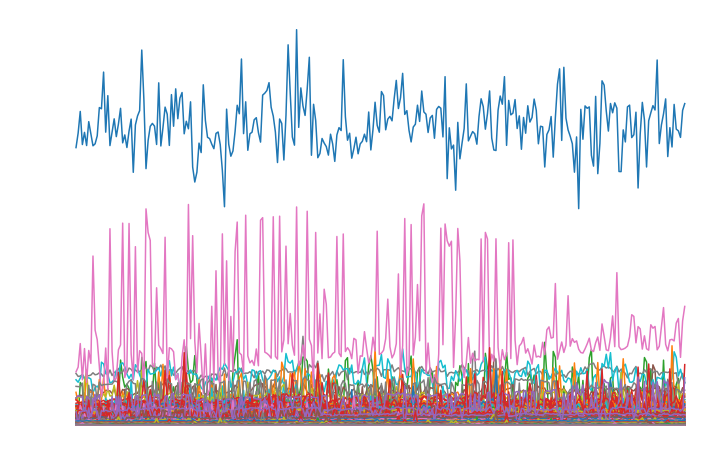

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12, 8))
plt.plot(X3)
plt.axis("off")
plt.show()

In [30]:
plt.show()